In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import numpy as np 
import pandas as pd

import fastai
from fastai.tabular import *

import os

In [4]:
PATH = os.getcwd()
PATH

'/home/ubuntu/kaggles/houses'

# Load data
Loaded train csv (split to train and validation) and test csv to Pandas df

In [5]:
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'BsmtCond',
            'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
            'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2',
            'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual',
            'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'BsmtFinSF1', 'BsmtFinSF2']
cont_names = ['LotFrontage', 'LotArea', 'MasVnrArea',    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
              'GrLivArea',  'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'MiscVal',
#               'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea',
             ]
all_columns = cat_names + cont_names
dep_var = 'SalePrice'

In [7]:
dtypes_cat = {cat:'category' for cat in cat_names}
dtypes_cont = {cont:np.float32 for cont in cont_names}
dtypes = {**dtypes_cat, **dtypes_cont, dep_var:np.float32}
# dtypes

In [8]:
train_csv_df = pd.read_csv(f'{PATH}/data/train.csv', dtype=dtypes, na_values=['NA'])
train_csv_df = train_csv_df[all_columns+[dep_var]]
# train_csv_df['BsmtUnfSF'] = train_csv_df['BsmtUnfSF'].fillna(train_csv_df['BsmtUnfSF'].mean())
# train_csv_df['TotalBsmtSF'] = train_csv_df['TotalBsmtSF'].fillna(train_csv_df['TotalBsmtSF'].mean())
# train_csv_df.info()

In [9]:
train_csv_df["SalePrice"] = np.log1p(train_csv_df["SalePrice"])

In [11]:
train_csv_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,...,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,SalePrice
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,TA,...,196.0,856.0,854.0,0.0,1710.0,0.0,61.0,0.0,0.0,12.247699
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,TA,...,0.0,1262.0,0.0,0.0,1262.0,298.0,0.0,0.0,0.0,12.109016
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,TA,...,162.0,920.0,866.0,0.0,1786.0,0.0,42.0,0.0,0.0,12.317171
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Gd,...,0.0,961.0,756.0,0.0,1717.0,0.0,35.0,0.0,0.0,11.849405
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,TA,...,350.0,1145.0,1053.0,0.0,2198.0,192.0,84.0,0.0,0.0,12.429220


In [12]:
test_csv_df = pd.read_csv(f'{PATH}/data/test.csv', index_col='Id', dtype=dtypes)
test_csv_df = test_csv_df[all_columns]
test_csv_df.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,...,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,TA,...,11622.0,0.0,896.0,0.0,0.0,896.0,140.0,0.0,120.0,0.0
1462,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,TA,...,14267.0,108.0,1329.0,0.0,0.0,1329.0,393.0,36.0,0.0,12500.0
1463,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,TA,...,13830.0,0.0,928.0,701.0,0.0,1629.0,212.0,34.0,0.0,0.0
1464,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,TA,...,9978.0,20.0,926.0,678.0,0.0,1604.0,360.0,36.0,0.0,0.0
1465,120,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,TA,...,5005.0,0.0,1280.0,0.0,0.0,1280.0,0.0,82.0,144.0,0.0


In [13]:
cont_columns_with_nans = ['BsmtUnfSF', 'TotalBsmtSF']

In [14]:
cat_sz = [(c, len(train_csv_df[c].cat.categories)+1) for c in cat_names]
# cat_sz

In [15]:
emb_szs = {c: min(50, (c+1)//2) for _,c in cat_sz}
# emb_szs

# Preprocessing
Data analysis and fields 

In [16]:
procs = [FillMissing, Categorify, Normalize]

In [18]:
test_data = TabularList.from_df(test_csv_df, path=PATH, cat_names=cat_names, cont_names=cont_names, procs=procs )

In [19]:
data = (
    TabularList.from_df(train_csv_df, cat_names=cat_names, cont_names=cont_names, procs=procs)
#         no_split()
        .random_split_by_pct(valid_pct=0.2, seed=1337)
        .label_from_df(cols=dep_var, label_cls=FloatList)
        .add_test(test_data)
        .databunch(bs=128, num_workers=8 )
)

In [20]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,BsmtCond,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,EnclosedPorch,3SsnPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,BsmtFinSF1,BsmtFinSF2,LotFrontage_na,MasVnrArea_na,LotFrontage,LotArea,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MiscVal,target
60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,0,#na#,Attchd,2002,RFn,2,TA,TA,Y,0,0,0,7,2009,WD,Normal,0,0,False,False,-0.1077,-0.1641,-0.0484,-0.8415,1.0728,-0.1197,0.2449,0.4001,0.3262,-0.2771,-0.0860,12.180760383605957
70,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,TA,Artery,Norm,1Fam,2Story,7,9,1920,1988,Hip,CompShg,VinylSd,VinylSd,None,TA,Gd,PConc,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,1,0,3,1,TA,7,Typ,0,#na#,Detchd,1930,Unf,2,TA,TA,Y,0,0,0,7,2009,WD,Normal,624,0,False,False,-0.8958,-0.1571,-0.5720,-0.8390,0.6659,-0.1197,-0.0854,-0.7672,-0.7013,-0.2771,-0.0860,11.870607376098633
60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,#na#,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002,RFn,2,TA,TA,Y,0,0,0,2,2006,WD,Normal,0,0,False,False,-0.2391,0.3821,0.2216,-0.5770,1.0978,-0.1197,0.4601,0.4001,0.7493,-0.2771,-0.0860,12.167856216430664
120,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Gd,Norm,Norm,TwnhsE,1Story,8,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,1,1,Ex,7,Typ,1,Gd,Attchd,2006,Fin,3,TA,TA,Y,0,0,0,10,2006,New,Partial,1154,0,False,False,-0.7645,-0.6976,-0.5720,1.0126,-0.8118,-0.1197,0.0723,1.7620,-0.7013,-0.2771,-0.0860,12.485831260681152
120,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,TA,Norm,Norm,TwnhsE,1Story,6,5,1998,1999,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,2,1,Gd,5,Typ,0,#na#,Attchd,1998,Fin,2,TA,TA,Y,0,0,0,8,2008,COD,Abnorml,266,0,False,False,-1.5964,-0.6892,-0.5720,0.4332,-0.8118,-0.1197,-0.3545,0.4001,0.3262,-0.2771,-0.0860,12.106257438659668
20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,TA,Norm,Norm,1Fam,1Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,2,1,Gd,6,Typ,0,#na#,Attchd,2006,RFn,2,TA,TA,Y,0,0,0,7,2006,New,Partial,684,0,False,False,-0.2829,-0.3288,-0.1090,0.1385,-0.8118,-0.1197,-0.5716,0.0840,0.1147,-0.2771,-0.0860,12.175618171691895
120,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,TA,Norm,Norm,TwnhsE,1Story,8,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,1,1,1,1,Gd,4,Typ,1,Gd,Attchd,2005,Fin,2,TA,TA,Y,0,0,0,4,2006,WD,Normal,1039,0,False,False,-1.4650,-0.7693,-0.5720,0.2065,-0.8118,-0.1197,-0.5215,-0.7672,0.5680,-0.2771,-0.0860,12.190963745117188
50,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,#na#,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,None,TA,TA,CBlock,#na#,#na#,#na#,#na#,GasA,TA,Y,SBrkr,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991,Fin,2,TA,TA,N,0,0,0,7,2008,WD,Normal,0,0,False,False,0.4177,0.7176,-0.5720,-0.1135,0.2521,-0.1197,0.1113,-0.7672,0.1902,-0.2771,-0.0860,11.808821678161621
120,FV,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,TA,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,#na#,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,1,1,1,1,Gd,4,Typ,0,#na#,Attchd,2007,Fin,2,TA,TA,Y,0,0,0,11,2007,New,Partial,1106,0,False,True,-1.5526,-0.6661,-0.5720,0.1

In [42]:
learner = tabular_learner(data, layers=[100], emb_drop=0.2, ps = 0.5, emb_szs=emb_szs,  
                          metrics=[root_mean_squared_error])
# learner.summary()

In [43]:
# lr = 1
# learner.lr_find()
# learner.recorder.plot()

In [44]:
learner.fit(epochs=140, lr=0.1)

epoch,train_loss,valid_loss,root_mean_squared_error
1,46.911583,2.942423,1.680587
2,27.083212,1.771490,1.371997
3,18.670614,1.268747,1.292775
4,13.864027,0.718761,0.933981
5,11.020461,0.479387,0.828332
6,8.855283,0.418878,0.725556
7,7.276343,0.341739,0.697652
8,6.096558,4.069633,1.940782
9,5.178173,0.210691,0.590500
10,4.485801,0.076867,0.552673


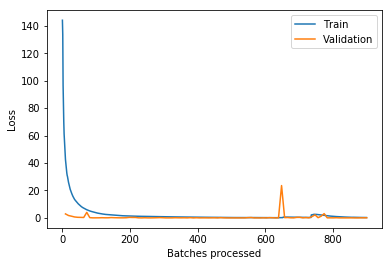

In [45]:
learner.recorder.plot_losses()

In [46]:
predicted, _ = learner.get_preds(ds_type=DatasetType.Test)
predicted = np.expm1(predicted)
len(predicted)

1459

In [47]:
test_csv_df_idx = test_csv_df.index.tolist()
predicted_list = list(zip(test_csv_df_idx, sum(predicted.tolist(), [])))
submission_df = pd.DataFrame(data=predicted_list, columns=['Id','SalePrice'])
print(submission_df.shape)
print(submission_df.head())

(1459, 2)
     Id      SalePrice
0  1461  107949.695312
1  1462  120714.507812
2  1463  139599.687500
3  1464  145116.875000
4  1465  149937.171875


In [50]:
submission_file = 'submission-nn.csv'
submission_file_comment = '70-epoch with lr=0.2 (doubled)'
submission_df.to_csv(submission_file, index=False)

In [51]:
from IPython.display import FileLink, FileLinks

FileLink(submission_file)

/home/ubuntu/kaggles/houses/submission-nn.csv

In [52]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f {submission_file} -m "{submission_file_comment}"

100%|██████████████████████████████████████| 26.1k/26.1k [00:02<00:00, 9.64kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques